# No-Show Appointment Analysis  
##### By: Chetan Shah

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>For my Data Analysis project I selected the "No-show appointments" dataset which includes information about whether or not patients show up to their appointments in Brazil. The dataset has over 100,000 rows and 14 fields. Given the data I want to know which features have a significant impact on whether a patient shows up to their appointment or not. The report is broken down in to three sections:
>> 1) **Data Wrangling**: Cleaning the data set<br/>
>> 2) **Exploratory Data Analysis**: Visual displays demonstrating the probability of showing depending on different variables<br/>
>> 3) **Conclusions**: Highlighting variables I believe have the greatest influence on whether a patient shows up or not<br/>

>I hope you enjoy reading my analysis and maybe learn something new :)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
##### The following steps focus on cleaning the data so it can be used for analysis.

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Visually the data seems quite clean except for the "ScheduledDay" and "AppointmentDay" fields which have a "T" and a "Z". Before I clean these fields I want to know 1) the data type of every field and 2) whether there are any nulls in the data. 

I also notice I can remove the "PatientID" and "AppointmentID" because these fields have no significance on the predictions and are only used for identification purposes.

##### Converting to Datetime & Dropping Columns

In [3]:
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)
df.drop(['PatientId','AppointmentID'],axis = 1, inplace = True)
 
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


##### Change 'No-show' to 'No_show"
Due to the hypen 'No-show' is difficult to call via attribute access therefore we changed it's name.

In [4]:
df.rename(columns= {'No-show': "No_show"}, inplace = True)

In [5]:
df.info() #tells us the type of each field
df.isnull().sum() #sums the total number of nulls in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

"ScheduledDay" and "AppointmentDay" have now been converted into a datetime format and in doing so the fields have been cleaned as well i.e. "Z" and "T" have been removed. Also we now know there are no nulls in the dataset.

Next we want to get a numeric sense of our data which we can get by pulling the summary statistics (below). 

In [6]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the above we learn a few things about the population:

 1) ~10% received scholarships <br/>
 2) ~20% suffer from Hipertension <br/>
 3) ~7% have diabetes <br/>
 4) ~3% suffer from alcoholism <br/>
 5) ~2.2% are handicapped <br/>
 6) ~32% received an SMS reminding them about their appointment <br/>
 7) The mean age is 37 years old
 
We can also see the ages of the population range from -1 to 115. Since a person cannot be less than 0 years old and 115 years seems too high we want to isolate the population to an acceptable range i.e. 0 - 100 years. 

Additionally, 'Handcap' (Handicap) values range from 0 to 4 but since we're only interested whether in whether a patient is handicapped or not we'll convert all values greater than 1 to 1. (Assuming values greater than 1 mean the indivudal is handicapped).  

##### Remove Age Outliers

In [7]:
df = df[(df.Age >= 0) & (df.Age <= 100)]
print(df.Age.count())

110519


8 outliers (110527 - 110519) have been removed

##### Converting Handicapped

In [8]:
df['Handcap'] = (df['Handcap'] >= 1).astype(int)
print(set(df['Handcap']))  

{0, 1}


All values have been converted to 1 or 0.

We may be interested in knowing if appointment attendance changes depending on the month or day of the week. Therefore we'll create two additional fields for this based on the 'AppointmentDay' column.

##### Creating additional fields

In [9]:
df['AppointmentMonth']= df['AppointmentDay'].dt.month
df['Appointment_dayofweek'] = df['AppointmentDay'].dt.weekday_name

df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,AppointmentMonth,Appointment_dayofweek
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Friday


<a id='eda'></a>
## Exploratory Data Analysis

>Now that we're trimmed and cleaned our data we can move on to the exploration phase. Ideally, we're trying to find charactersitics that had an impact on the probability of showing up, therefore we'll explore the following:
>>  1) Prob. of showing up depending on age<br/>
>>	2) Prob. of showing up depending on day of the week<br/>
>>	3) Prob. of showing depending on whether individual received sms<br/>
>>	4) Prob. of showing up depending on condition<br/>
>>	5) Prob. of showing up depending on gender<br/>
>>	6) Prob. of showing up depending on neighborhood<br/> 

### Pivot Function (Continuous Variables)

The following function pivots the 'No_show' column by counting the number of people who showed up ('No') and the ones who did not ('Yes'), for all instances in the 'group_by' field. So we will input the characteristics we wish to analyze in place of 'group_by'. This will work for all fields that have **continuous variables**  

In [10]:
def probStatus(dataset, group_by):
    df = pd.crosstab(index = dataset[group_by], columns = dataset.No_show).reset_index()
    df['probShowUp'] = df['No'] / (df['Yes'] + df['No'])
    return df[[group_by, 'probShowUp']]

##### Exploring Age

AttributeError: module 'seaborn' has no attribute 'plt'

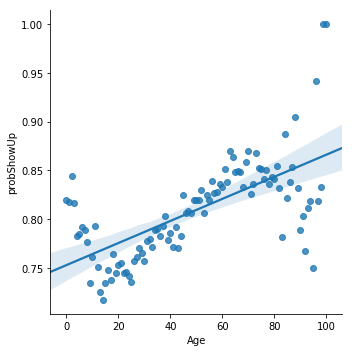

In [11]:
sns.lmplot(data = probStatus(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
sns.plt.xlim(0, 100)
sns.plt.title('Probability of showing up with respect to Age')
sns.plt.show()

In [12]:
x = pd.DataFrame(probStatus(df, 'Age'))
x['Age'].corr(x['probShowUp'])

0.655532573138632

There is strong positive correlation between age and likelyhood of the individual showing up to their appointment.

### Pivot Function (Categorical Variables)

We are trying to determine the probability of an individual showing up for every outcome of a specified field.

In [13]:
def probcatvar(items):
    rows = []
    for item in items:
        for val in df[item].unique(): #loops over all the unique values in the dataframe in the 'item' column
            total = len(df[df[item] == val]) #boolean indices used to count the number of '1's and '0's for each field
            n = float(len(df[(df[item] == val) & (df.No_show == 'No')])) #'n' tells us the number of individuals who showed up ('No') for each outcome of the specified field
            row = {'Field': item} 
            row.update({'Outcome': val, 'Probability': n/total}) # updates 'row' with 'Value' and 'Probability'
            rows.append(row)
    return pd.DataFrame(rows)

##### Gender

In [14]:
probcatvar(['Gender'])

,Field,Outcome,Probability
0,Gender,F,0.796873
1,Gender,M,0.800321


As we can see the probability of showing up between Males and Females is almost exactly the same, therefore, this characteristic does not seem to have a significant impact on attendance.

##### SMS Received & Scholarship

AttributeError: module 'seaborn' has no attribute 'title'

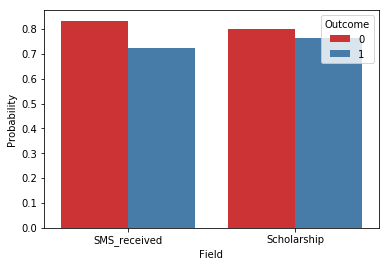

In [15]:
sns.barplot(data = probcatvar(['SMS_received','Scholarship']),
            x = 'Field', y = 'Probability', hue = 'Outcome', palette = 'Set1' )
sns.title('Probability of showing up')
sns.ylabel('Probability')
sns.show()

This is a little surprising because you'd expect to see greater attendance from individuals who received an SMS reminder and/or received Scholarships however, the opposite seems to be true.

AttributeError: module 'seaborn' has no attribute 'plt'

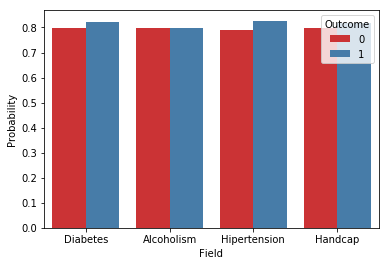

In [16]:
sns.barplot(data = probcatvar(['Diabetes', 'Alcoholism', 'Hipertension',
                                         'Handcap']),
            x = 'Field', y = 'Probability', hue = 'Outcome', palette = 'Set1' )
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

##### Weekday

AttributeError: module 'seaborn' has no attribute 'plt'

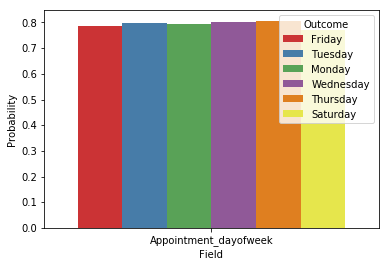

In [21]:
sns.barplot(data = probcatvar(['Appointment_dayofweek']),
            x = 'Field', y = 'Probability', hue = 'Outcome', palette = 'Set1' )
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

As we can see attendance stays relatively same across the days of the week

##### Month

AttributeError: module 'seaborn' has no attribute 'plt'

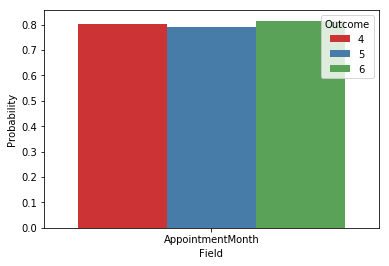

In [17]:
sns.barplot(data = probcatvar(['AppointmentMonth']),
            x = 'Field', y = 'Probability', hue = 'Outcome', palette = 'Set1' )
sns.plt.title('Probability of showing up')
sns.plt.ylabel('Probability')
sns.plt.show()

Probability of showing seems to be higher in June but only slightly

##### Neighbourhood

In [18]:
def probStatus(dataset, group_by):
    df = pd.crosstab(index = dataset[group_by], columns = dataset.No_show).reset_index()
    df['probShowUp'] = df['No'] / (df['Yes'] + df['No'])
    df['Number_Appts'] = df['No']+df['Yes']
    return df[[group_by, 'probShowUp','Number_Appts']]

neighbourhood_appts = (probStatus(df,'Neighbourhood').sort_values('probShowUp', ascending = True))
neighbourhood_appts['Number_Appts'].describe()

count      81.000000
mean     1364.432099
std      1369.117662
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: Number_Appts, dtype: float64

Certain neighbourhoods only have 1 appointment which skews the data significantly. Given this, we would want to focus only on neighbourhoods where at least 100 appointments have been by individuals.

In [19]:
neighbourhood_appts = neighbourhood_appts[(neighbourhood_appts['Number_Appts']>100)]
neighbourhood_appts.head(5)

No_show,Neighbourhood,probShowUp,Number_Appts
70,SANTOS DUMONT,0.710815,1276
61,SANTA CECÍLIA,0.725446,448
62,SANTA CLARA,0.735178,506
36,ITARARÉ,0.737336,3514
40,JESUS DE NAZARETH,0.756046,2853


In [20]:
neighbourhood_appts.tail(5)

No_show,Neighbourhood,probShowUp,Number_Appts
66,SANTA MARTHA,0.841584,3131
17,DO CABRAL,0.842857,560
16,DE LOURDES,0.845902,305
73,SOLON BORGES,0.852878,469
48,MÁRIO CYPRESTE,0.854447,371


Clearly certain neighbourhoods have a higher attendance rate than others (~15% between the top and bottom). 

<a id='conclusions'></a>
## Conclusions



We explored 12 charactersitics of the dataset to determine which ones most strongly influence the probability of an individual showing up to their doctors appointment. Age seems to provide the strongest indication of whether an individual shows up to their appointment given it has a strong positive correlation of 0.67.

Neighbourhood also seems to have an impact on attendance with a difference of 15% between the highest and lowest. 

However, there was an inverse relationship between SMS received and probability of showning up. This is suprising because you would expect people to be more likely to attend their appointment after being reminded via text messages. 

All other factors do not provide any strong evidence of influencing the probability of showing up. 

#### Limitations 

The dataset is only based on 27 unique dates spread over  three months (April, May and June), this does not provide a representative sample for predicting attendance througout the year. A lack of data could also mean we missed out on additional features that may not have been present in our current dataset. 

For a more concrete analysis it would have useful to explore features such as employment, income or a patient's previous attendance record. Both these features can easily be tracked and could be strong indications of wheather someone shows up.
